# Aim: Predict stock price using Recurrent neural network

In [2]:
import pandas as pd
import numpy as np
train_data = pd.read_csv(r'C:\Users\adity\Downloads\Google_Stock_Price_Train.csv')
train = train_data.loc[:,['Open']].values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(train)

x_train=[]
y_train=[]
timesteps=50
for i in range(timesteps, 1258):
        x_train.append(train_scaled[i-timesteps:i, 0])
        y_train.append(train_scaled[i,0])
x_train, y_train= np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import tensorflow_addons as tfa

rnn=Sequential()
rnn.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
rnn.add(Dropout(rate=0.2))
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(rate=0.2))
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(rate=0.2))
rnn.add(LSTM(units=50, return_sequences=False))
rnn.add(Dropout(rate=0.2))
rnn.add(Dense(units=1))

rnn.compile(loss='mean_squared_error',optimizer='adam', metrics=[tfa.metrics.RSquare(y_shape = (1,))])
rnn.fit(x=x_train, y=y_train, epochs=50, batch_size=32)


Epoch 1/50
38/38 [==============================] - 12s 111ms/step - loss: 0.0577 - r_square: 0.2332
Epoch 2/50
38/38 [==============================] - 4s 112ms/step - loss: 0.0063 - r_square: 0.9164
Epoch 3/50
38/38 [==============================] - 4s 110ms/step - loss: 0.0054 - r_square: 0.9288
Epoch 4/50
38/38 [==============================] - 4s 112ms/step - loss: 0.0049 - r_square: 0.9355
Epoch 5/50
38/38 [==============================] - 4s 112ms/step - loss: 0.0050 - r_square: 0.9336
Epoch 6/50
38/38 [==============================] - 4s 112ms/step - loss: 0.0050 - r_square: 0.9341
Epoch 7/50
38/38 [==============================] - 4s 111ms/step - loss: 0.0043 - r_square: 0.9429
Epoch 8/50
38/38 [==============================] - 4s 112ms/step - loss: 0.0043 - r_square: 0.9422
Epoch 9/50
38/38 [==============================] - 4s 111ms/step - loss: 0.0042 - r_square: 0.9443
Epoch 10/50
38/38 [==============================] - 4s 111ms/step - loss: 0.0046 - r_square: 0.938

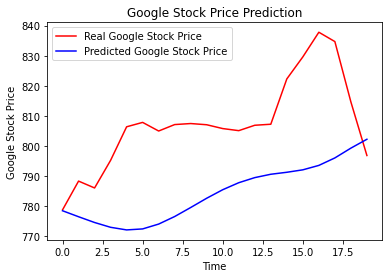

In [4]:
import matplotlib.pyplot as plt
test_data = pd.read_csv(r'C:\Users\adity\Downloads\Google_Stock_Price_Test.csv')
real_stock_price = test_data.loc[:,['Open']].values
total_data = pd.concat((train_data['Open'],test_data['Open']),axis=0)
inputs = total_data[len(total_data)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #min max scaler
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()